In [29]:
#importing necessary packages
import cv2
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
from matplotlib import rcParams
import ipywidgets as widgets
import PIL.Image

from skimage import color
from skimage import io

from PIL import Image as Img
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [30]:
#generating a qr code
qr = qrcode.QRCode(
    version=5,
    error_correction=qrcode.constants.ERROR_CORRECT_Q,
    box_size=15,
    border=1,
)
qr.add_data('scan me')
qr.make(fit=True)
img = qr.make_image(fill_color='black', back_color='white').convert('RGB')
img.save('qr.png')

In [31]:
#decoding the qr code
img=cv2.imread('qr.png')
det=cv2.QRCodeDetector()
val, pts, st_code=det.detectAndDecode(img)

In [32]:
#creating the buttons
gray = widgets.Button(description='Grayscale')
gaus_blur = widgets.Button(description='Gaussian Blur')
red_to_zero = widgets.Button(description='Remove red channel')
out = widgets.Output()

In [33]:
#reading the image
img_path = input('Please input an image path:')
c_img = mpimg.imread(img_path)

Please input an image path:bycicle.jpg


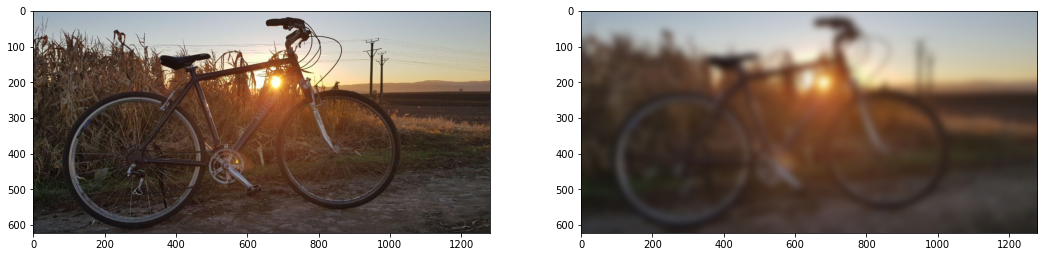

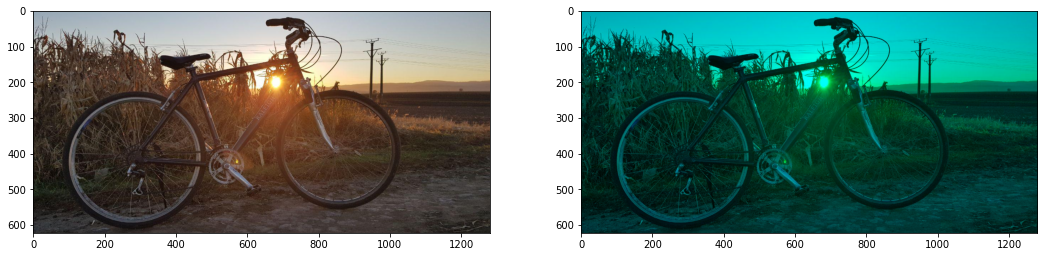

In [35]:
#adding functionality to the buttons


%matplotlib inline
#this is for showing the images in the notebook cell
count = [0]

def gray_clicked(img_path): 
    with out:
        gray = cv2.cvtColor(c_img,cv2.COLOR_RGB2GRAY)
        rcParams['figure.figsize'] = 18, 15
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(c_img)
        ax[1].imshow(gray, cmap='gray')
        plt.show()
        
        
gray.on_click(gray_clicked)

def gaus_blur_clicked(img_path):
    gaus = cv2.GaussianBlur(c_img,(51,51),10)
    rcParams['figure.figsize'] = 18, 15
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(c_img)
    ax[1].imshow(gaus)
    plt.show()
    
gaus_blur.on_click(gaus_blur_clicked)

def red_to_zero_clicked(img_path):
    c_img_arr = np.array(c_img, np.uint8)
    c_img_arr[:,:,0] = 0
    rcParams['figure.figsize'] = 18, 15
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(c_img)
    ax[1].imshow(c_img_arr)
    plt.show()
    
red_to_zero.on_click(red_to_zero_clicked)

buttons = widgets.HBox([gray, gaus_blur, red_to_zero])
widgets.VBox([buttons,out])